In [1]:
import matplotlib.pyplot as plt

In [2]:
import pandas as pd

In [4]:
df = pd.read_csv('train.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.dropna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [17]:
group_surive_rate = df.groupby('Sex')['Survived'].mean()*100
group_surive_rate

Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64

In [18]:
survivor_c = df['Survived'].value_counts()
survivor_c

Survived
0    549
1    342
Name: count, dtype: int64

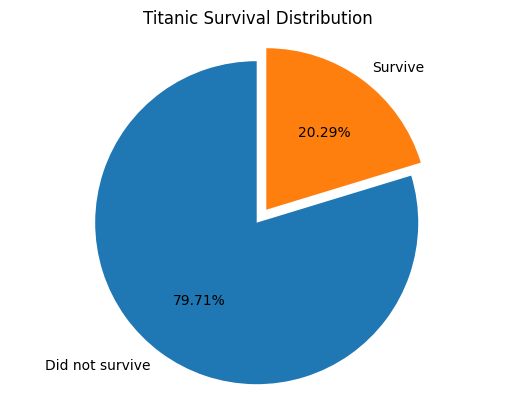

In [28]:
lable = ['Did not survive','Survive']
exp = [0,0.1]
plt.pie(group_surive_rate, labels=lable,autopct='%.2f%%', startangle=90,explode=exp )
plt.title("Titanic Survival Distribution")
plt.axis('equal')
plt.show()

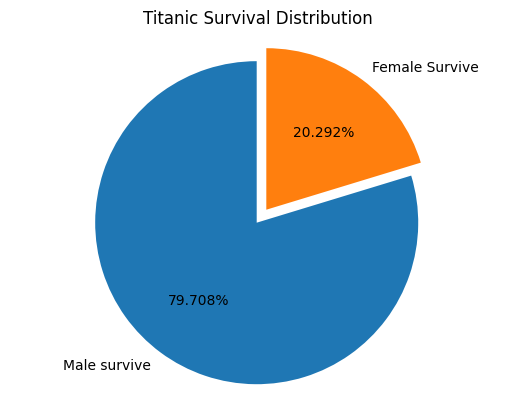

In [32]:
class_value = df['Pclass'].value_counts()
class_survive = df.groupby('Pclass')['Survived'].mean()*100
class_survive

Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64

([<matplotlib.axis.YTick at 0x24109513ec0>,
 [Text(0, 0, '0%'),
  Text(0, 10, '10%'),
  Text(0, 20, '20%'),
  Text(0, 30, '30%'),
  Text(0, 40, '40%'),
  Text(0, 50, '50%'),
  Text(0, 60, '60%'),
  Text(0, 70, '70%')])

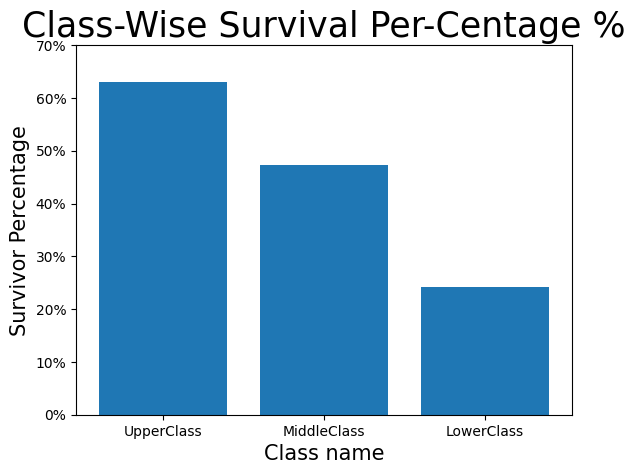

In [40]:
survive_tick = list(range(0,80,10))
labels = ['UpperClass', 'MiddleClass', 'LowerClass']
plt.bar(labels,class_survive)
plt.title("Class-Wise Survival Per-Centage %" ,fontsize=25)
plt.xlabel("Class name",fontsize=15)
plt.ylabel("Survivor Percentage",fontsize=15)
plt.yticks(survive_tick, [f'{v}%' for v in survive_tick])